In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline

plt.style.use('ggplot') 
font = {'family':'Osaka'}
matplotlib.rc('font', **font)

df = pd.read_csv('../data/2nd-saisoku.csv')

# 名古屋に両日同数積んだ人だけ抽出
# →積み枚数グループ毎に当選確率計算
evenly_nagoya = df[df.serials_nagoya1 == df.serials_nagoya2]
grouped_got_nagoya = evenly_nagoya.groupby('serials_nagoya1')['got_nagoya'].sum()
grouped_entry_nagoya = evenly_nagoya.groupby('serials_nagoya1')['timestamp'].count()
grouped_probability_nagoya = grouped_got_nagoya.div(grouped_entry_nagoya)

# 神戸に両日同数積んだ人だけ抽出
# →積み枚数グループ毎に当選確率計算
evenly_kobe = df[df.serials_kobe1 == df.serials_kobe2]
grouped_got_kobe = evenly_kobe.groupby('serials_kobe1')['got_kobe'].sum()
grouped_entry_kobe = evenly_kobe.groupby('serials_kobe1')['timestamp'].count()
grouped_probability_kobe = grouped_got_kobe.div(grouped_entry_kobe)

# 埼玉に両日同数積んだ人だけ抽出
# →積み枚数グループ毎に当選確率計算
evenly_saitama = df[df.serials_saitama1 == df.serials_saitama2]
grouped_got_saitama = evenly_saitama.groupby('serials_saitama1')['got_saitama'].sum()
grouped_entry_saitama = evenly_saitama.groupby('serials_saitama1')['timestamp'].count()
grouped_probability_saitama = grouped_got_saitama.div(grouped_entry_saitama)

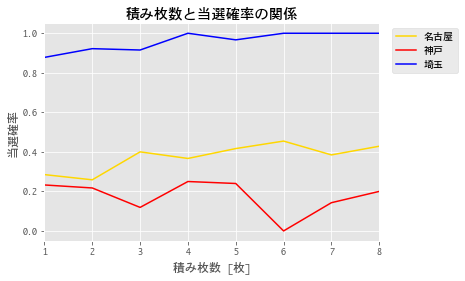

In [2]:
grouped_probability_nagoya.plot(color='gold', label='名古屋')
grouped_probability_kobe.plot(color='red', label='神戸')
grouped_probability_saitama.plot(color='blue', label='埼玉')

plt.title('積み枚数と当選確率の関係')
plt.xlabel('積み枚数 [枚]')
plt.ylabel('当選確率')
plt.xlim(1, 8)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))